 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

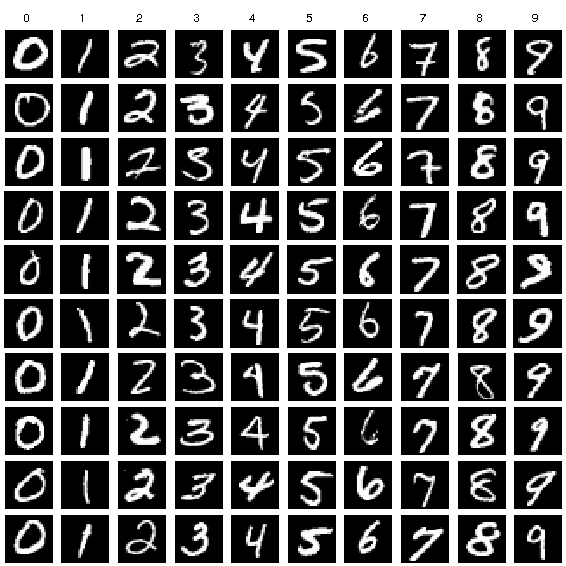

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import ReduceLROnPlateau
###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

2025-03-25 11:28:29.458479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742902109.474444   66405 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742902109.479405   66405 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742902109.492295   66405 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742902109.492312   66405 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742902109.492314   66405 computation_placer.cc:177] computation placer alr

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

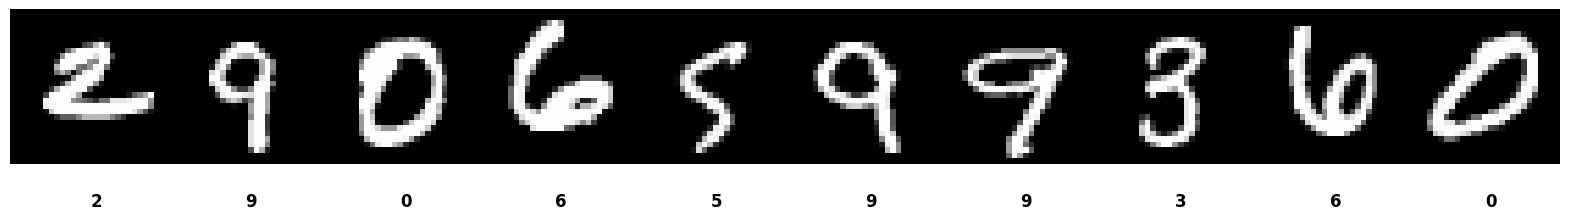

In [4]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [5]:
###################################
# Write your own code here #
# One hot endcoding the numbers
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Normalizing the image data
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

print(X_train_normalized.shape)
print(y_train_encoded.shape)
###################################

(60000, 28, 28)
(60000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [6]:
###################################
# Write your own code here #
# Convolutional network building
# Original model structure:
# Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
# Optimized structure:
model = Sequential([
    InputLayer(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    
    Dropout(0.3),    
    Dense(10, activation='softmax')
])
###################################


I0000 00:00:1742902111.864833   66405 gpu_process_state.cc:208] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1742902111.865778   66405 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6632 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem 

In [7]:
loss = 'categorical_crossentropy'
optimizer = Adam()
metrics = ['accuracy']
learning_rate = 0.001
epoch = 50

###################################
# Write your own code here #
# Compiling the model
reduce_lr = ReduceLROnPlateau(monitor='loss', 
                              factor=0.2, 
                              patience=3, 
                              min_lr=0.0001, 
                              verbose=1
                              )

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

###################################
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [8]:
###################################
# Write your own code here #
# Training the model
with tf.device('/GPU:0'):
    model.fit(X_train_normalized,
              y_train_encoded,
              epochs=epoch,
              validation_split=0.2,
              batch_size=128,
              callbacks=[reduce_lr]
              )
###################################

Epoch 1/50


I0000 00:00:1742902113.174647   66471 service.cc:152] XLA service 0x7f71280044b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742902113.174671   66471 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-03-25 11:28:33.211388: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742902113.309812   66471 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-25 11:28:33.558633: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[128,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0} %bitcast.4031, f32[32,1,3,3]{3,2,1,0} %bitcast.4038, f32[32]{0} %bitcast.4447), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn

 58/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 1.7696

I0000 00:00:1742902114.712951   66471 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.7785

2025-03-25 11:28:35.973778: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[128,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0} %bitcast.483, f32[32,1,3,3]{3,2,1,0} %bitcast.490, f32[32]{0} %bitcast.492), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/snp/VUT/MPA-MLF/LAB-07/env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-03-25 11:28:35.997787: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potential

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7820 - loss: 0.7586 - val_accuracy: 0.9723 - val_loss: 0.0969 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9640 - loss: 0.1160 - val_accuracy: 0.9801 - val_loss: 0.0699 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0815 - val_accuracy: 0.9834 - val_loss: 0.0569 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0666 - val_accuracy: 0.9840 - val_loss: 0.0534 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0530 - val_accuracy: 0.9867 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9877 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accurac

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

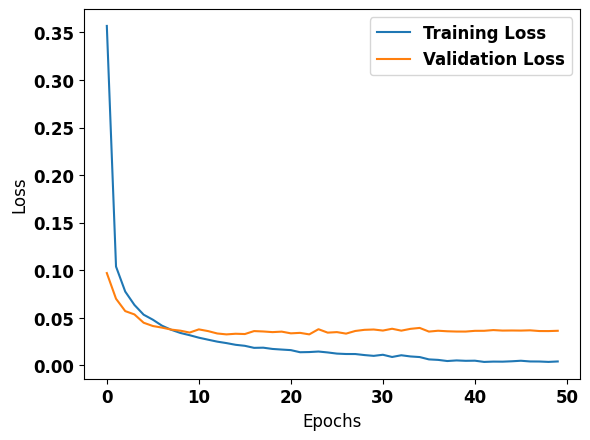

In [9]:
###################################
# Write your own code here #
# Plotting training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

2025-03-25 11:29:32.683207: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0} %bitcast.483, f32[32,1,3,3]{3,2,1,0} %bitcast.490, f32[32]{0} %bitcast.492), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/snp/VUT/MPA-MLF/LAB-07/env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-03-25 11:29:32.705366: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially

306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9907 - loss: 0.0377

2025-03-25 11:29:33.489789: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[16,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,1,28,28]{3,2,1,0} %bitcast.483, f32[32,1,3,3]{3,2,1,0} %bitcast.490, f32[32]{0} %bitcast.492), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/snp/VUT/MPA-MLF/LAB-07/env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-03-25 11:29:33.510578: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0375
Test Accuracy: 99.270%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


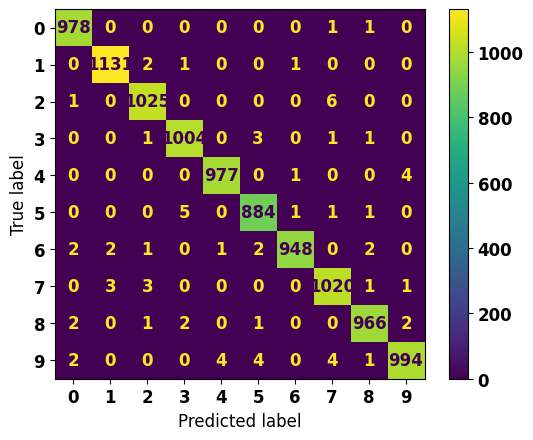

In [10]:
###################################
# Write your own code here #
# Evaluationg the trained model
results = model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy: {results[1]*100:.3f}%")

# Confusion matrix
y_pred = model.predict(X_test_normalized)
y_pred_decode = np.argmax(y_pred, axis=1)
y_test_decode = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_test_decode, y_pred_decode)
ConfusionMatrixDisplay.from_predictions(y_test_decode, y_pred_decode)
###################################

2025-03-25 11:29:35.081225: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[1,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,28,28]{3,2,1,0} %bitcast.173, f32[32,1,3,3]{3,2,1,0} %bitcast.180, f32[32]{0} %bitcast.182), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/snp/VUT/MPA-MLF/LAB-07/env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-03-25 11:29:35.103519: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially b

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


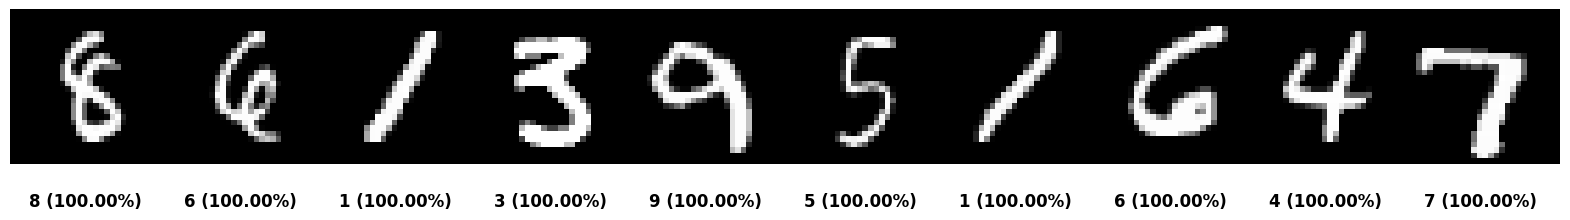

In [11]:
# Evaluates and shows the model's confidence in its predictions
def evaluate_random_images(images: np.array, labels: np.array, count: int = 10) -> None:
  index = np.array(len(images))
  selected_ind = np.random.choice(index, count)

  selected_img = images[selected_ind]
  selected_labels = labels[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    normalized_img = selected_img[id_label] / 255
    prediction = model.predict(np.expand_dims(normalized_img, axis=0))    
    plt.text(3+28*id_label, 28*(5/4), f'{prediction.argmax()} ({prediction.max()*100:.2f}%)')
  plt.axis('off')
  plt.show()
  
evaluate_random_images(X_test, y_test)

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [12]:
#Done in the code above